# Unsupervised Learning.


When we don't have a target variable to predict that type of problem is classified as 'Unsupervised Learning'. 

## Principal Component Analysis.

The first step is to standardize each varible to have a mean of zero and standard deviation of 1 (We do this in order to capture the maximum variance else the scale of other varible can dominate our Principal Component).

## Clustering Methods.

Clustering data such data in same cluster are similar to each other whereas dissimilar to data from other cluster. The two type of clustering algorithms are:

1. K-means clustering
2. Hierarchical clustering

We can perform clustering on observation as well as features.

### K-Means Clustering.

-> We start with a number 'k'. Each and every observation is assigned to one and only one cluster. The observation are assigned to cluster such that within cluster variation is as small as possible. The variation is generally represented Euclidean distance.

-> Since K-Means clustering tends to find local minima based on the initial assignment of observation to a cluster, therefore it is required to run this algorithm multiple time by assigning observation to different clusters randomly.

### Hierarchical Clustering.

This is a bottom up approach where in starting each observation is its own cluster and then two cluster are fused to form a branch. That in future can fuse with another branch or leaf based on similarity. The tree is called 'Dendogram' and is used to identify the number of clusters present.

In this algorithm also we use Euclidean distance to measure the similarity between two observations.

The concept of dissimilarity between different groups or cluster are introduced by 'linkage'. There are 4 types of linkage:

1. Complete.
2. Average.
3. Single.
4. Centroid.

Apart from Euclidean distance, 'Correlation-Based distance' is also used to find similarity.

In [274]:
# importing important libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [275]:
# reading the USArrests data
USArrests = pd.read_csv(r'C:\Users\Vikram\Desktop\ISLR\Data\USArrests.csv', header = 'infer', index_col='Unnamed: 0')

In [276]:
# mean of each column in the data set
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [277]:
# Variance of each column in the data set
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [278]:
# scaling the data set to have a mean of 0 and variance of 1 using sklearn preprocessing module befor fitting the PCA so that the
# principal components are scale independent.
from sklearn import preprocessing

USArrests_scaled = preprocessing.scale(USArrests)

C:\Users\Vikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by the scale function.



In [279]:
# performing the PCA on the scaled data set
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(USArrests_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [280]:
# printing the information captured by each principal components for different columns present in the data set
print(pd.DataFrame(pca.components_,columns=USArrests.columns))

     Murder   Assault  UrbanPop      Rape
0  0.535899  0.583184  0.278191  0.543432
1  0.418181  0.187986 -0.872806 -0.167319
2 -0.341233 -0.268148 -0.378016  0.817778
3  0.649228 -0.743407  0.133878  0.089024


In [281]:
# variance explained by the principal components
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [282]:
# ratio of variance explained by principal components. As visible the first two components explains almost ~87% of variance
# present in the data set
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

(0, 3.15)

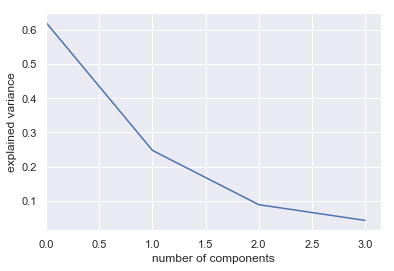

In [283]:
# plotting the variance ratio explained by different principal components
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance');
plt.xlim(xmin=0)

(0, 3.15)

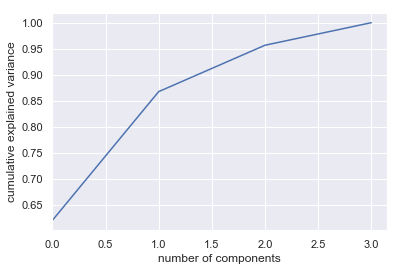

In [284]:
# cumulative variance ratio explained by different principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(xmin=0)

In [285]:
# importing kmeans module from sklearn in order to perform kmeans clustering
from sklearn.cluster import KMeans

In [286]:
# setting the random seed
np.random.seed(100)

In [287]:
# generating simulated data sets and making cluster by subtracting and adding number to two different equal set of number
# and fitting the kmeans clustering on the data sets
x  = np.random.normal(0,1,(50,2))
x[0:25,0] = x[0:25,0]+3
x[0:25,1] = x[0:25,1]-4

kmeans = KMeans(n_clusters=2)
km = kmeans.fit(x)
labels = km.predict(x)

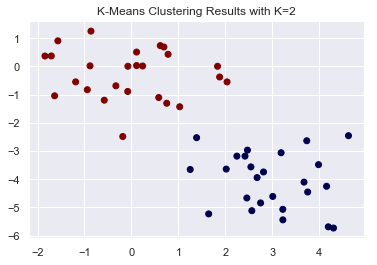

In [288]:
# visualizing the cluster formed
plt.scatter(x[:,0], x[:,1], c =labels, cmap='seismic')
plt.title("K-Means Clustering Results with K=2");

In [289]:
# the center of both clusters
print(km.cluster_centers_)

[[ 2.96999166 -4.05159307]
 [-0.04936282 -0.28569918]]


In [290]:
# importing the hierarchy clustering module from scipy
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [291]:
# performing the hierarchical clustering on the above simulated data set using different linkage methods.
np.random.seed(1)
h_comp = linkage(x, 'complete')
h_avg = linkage(x, 'average')
h_sing = linkage(x, 'single')

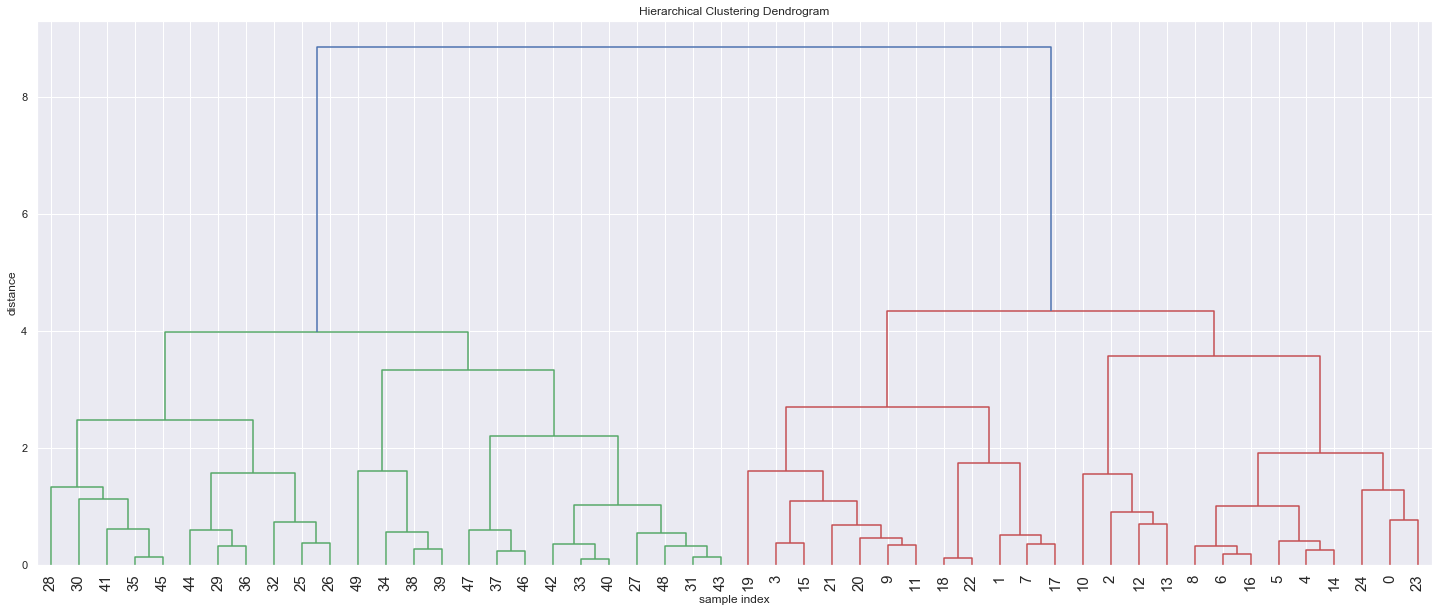

In [292]:
# plotting dendrogram for complete linkage
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    h_comp,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

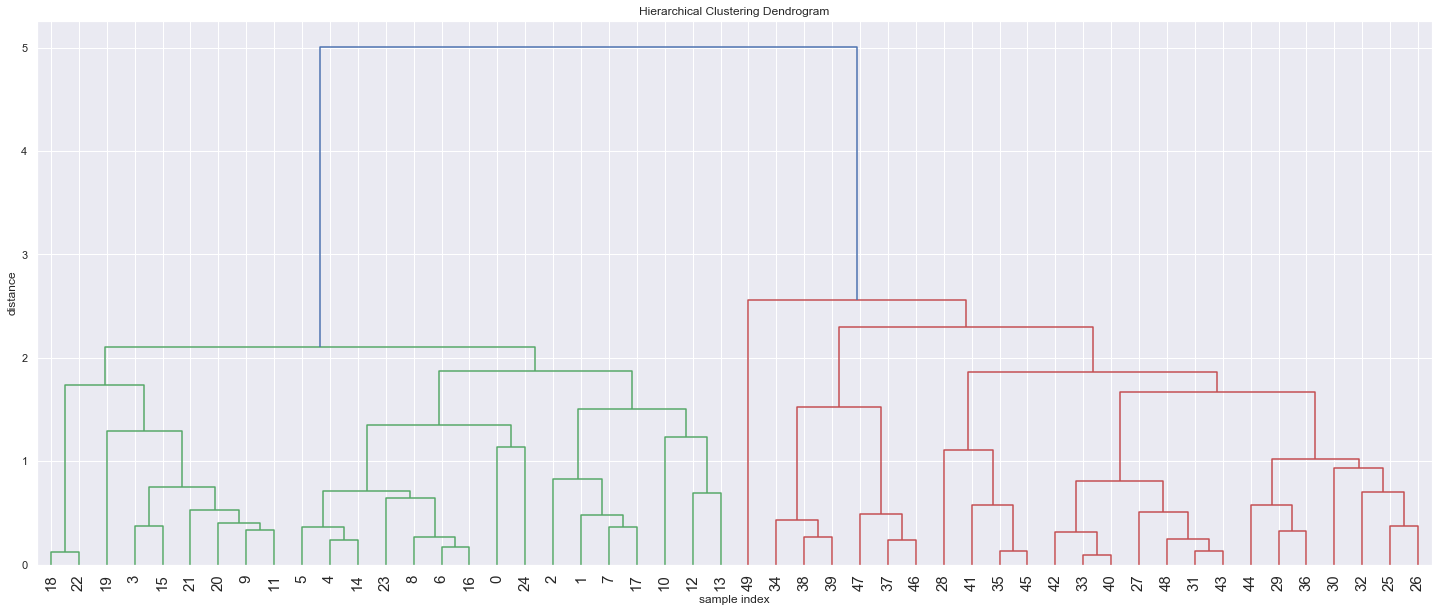

In [293]:
# # plotting dendrogram for average linkage
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    h_avg,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

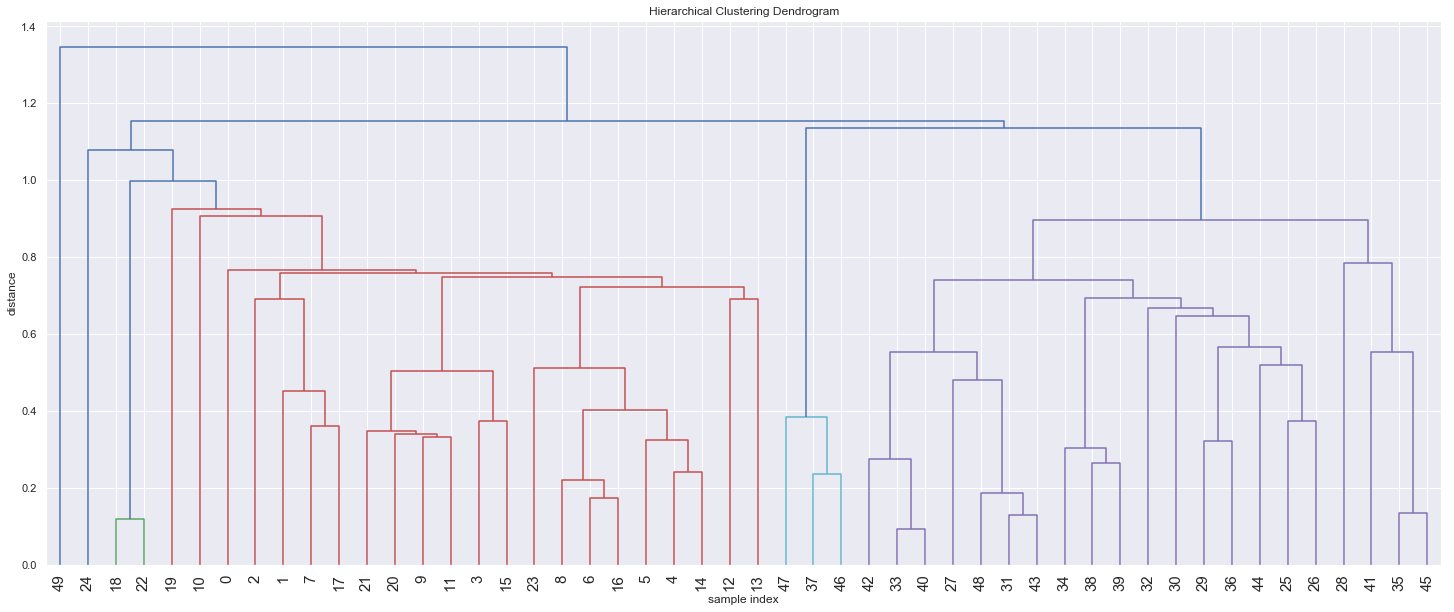

In [294]:
# plotting dendrogram for single linkage
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    h_sing,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [295]:
# reading the gene expression data sets
nci_labs = pd.read_csv(r'C:\Users\Vikram\Desktop\ISLR\Data\NCI60$labs.csv', header='infer', index_col='Unnamed: 0')
nci_data = pd.read_csv(r'C:\Users\Vikram\Desktop\ISLR\Data\NCI60$data.csv', header='infer', index_col='Unnamed: 0')

In [296]:
# dimension of our data sets
nci_data.shape

(64, 6830)

In [297]:
# different type of cancer and their number of records. We can see that there are 14 distinct cancer types including 'Unknown'
# type
nci_labs.x.value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7A-repro    1
K562A-repro    1
UNKNOWN        1
K562B-repro    1
MCF7D-repro    1
Name: x, dtype: int64

In [298]:
# scaling the data set before performing PCA for the reason mentioned above.
nci_data_scaled = preprocessing.scale(nci_data)

In [299]:
# fitting PCA on gene expression data set
pca1 = PCA()
pca1.fit(nci_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [300]:
# converting the different cancer type as factors for visualization process
l = pd.get_dummies(nci_labs['x'])
l.values.argmax(1)

array([ 1,  1,  1, 12,  0,  1,  1,  0,  9,  9, 12, 12, 12, 12, 12, 12, 12,
        0,  9, 12, 13, 10,  8, 11, 10, 10, 10, 10, 10, 11,  9,  9,  9,  5,
        4,  3,  5,  5,  5,  5,  5,  2,  2,  2,  2,  2,  2,  2,  6,  0,  7,
        0,  9,  9,  9,  8,  0,  0,  8,  8,  8,  8,  8,  8], dtype=int64)

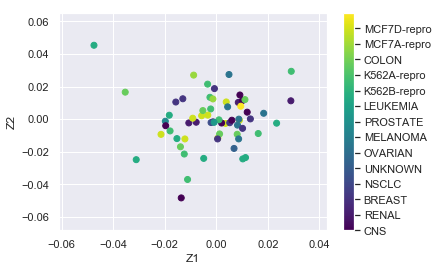

In [301]:
# plotting the different cancer type across first two principal components
plt.scatter(pca1.components_[:,0], pca1.components_[:,1], c =l.values.argmax(1), cmap='viridis')
plt.xlabel("Z1")
plt.ylabel("Z2")
color = nci_labs.x.unique()
label = l.values.argmax(1)
cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(color);

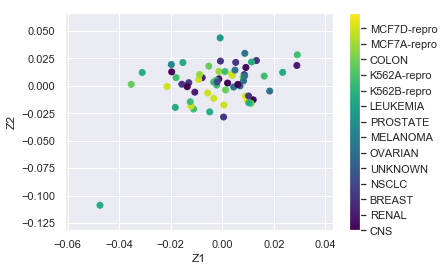

In [302]:
# plotting the different cancer type across first and third principal components
plt.scatter(pca1.components_[:,0], pca1.components_[:,2], c =l.values.argmax(1), cmap='viridis')
plt.xlabel("Z1")
plt.ylabel("Z2")
color = nci_labs.x.unique()
label = l.values.argmax(1)
cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(color);

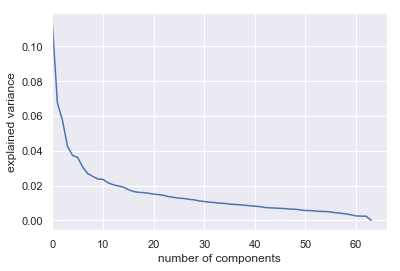

In [303]:
#  the variance ratio explained by different principal components
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xlim(xmin=0);

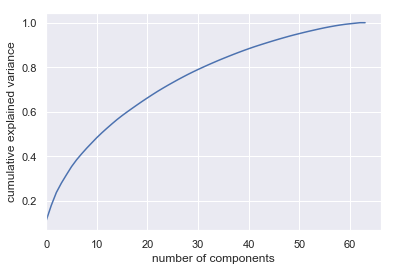

In [304]:
# #  the cumulative variance ratio explained by different principal components
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(xmin=0);

In [305]:
#  performing hierarchical clustering on gene expression data sets.
nci_comp = linkage(nci_data_scaled, 'complete')
nci_avg = linkage(nci_data_scaled, 'average')
nci_sing = linkage(nci_data_scaled, 'single')

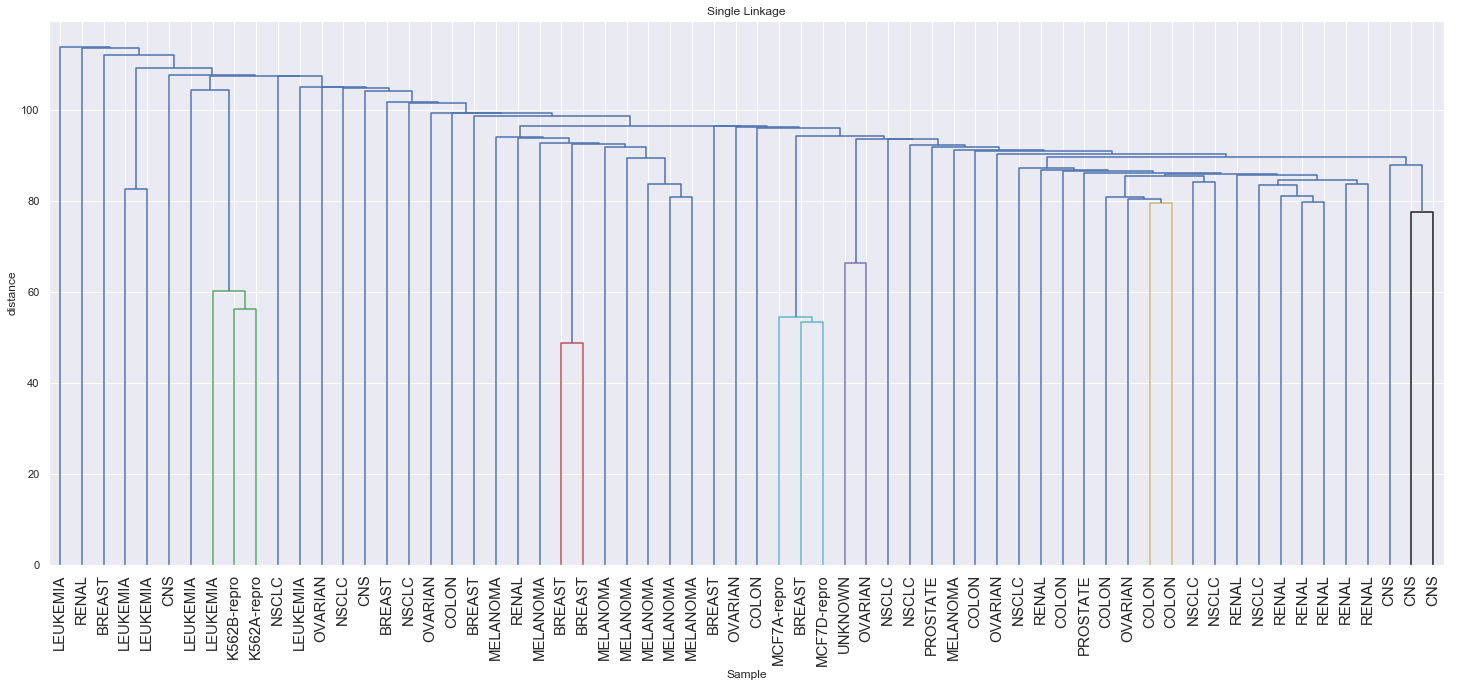

In [306]:
# dendrogram for single linkage
plt.figure(figsize=(25, 10))
plt.title('Single Linkage')
plt.xlabel('Sample')
plt.ylabel('distance')
dendrogram(
    nci_sing,
    labels = nci_labs.x.values,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

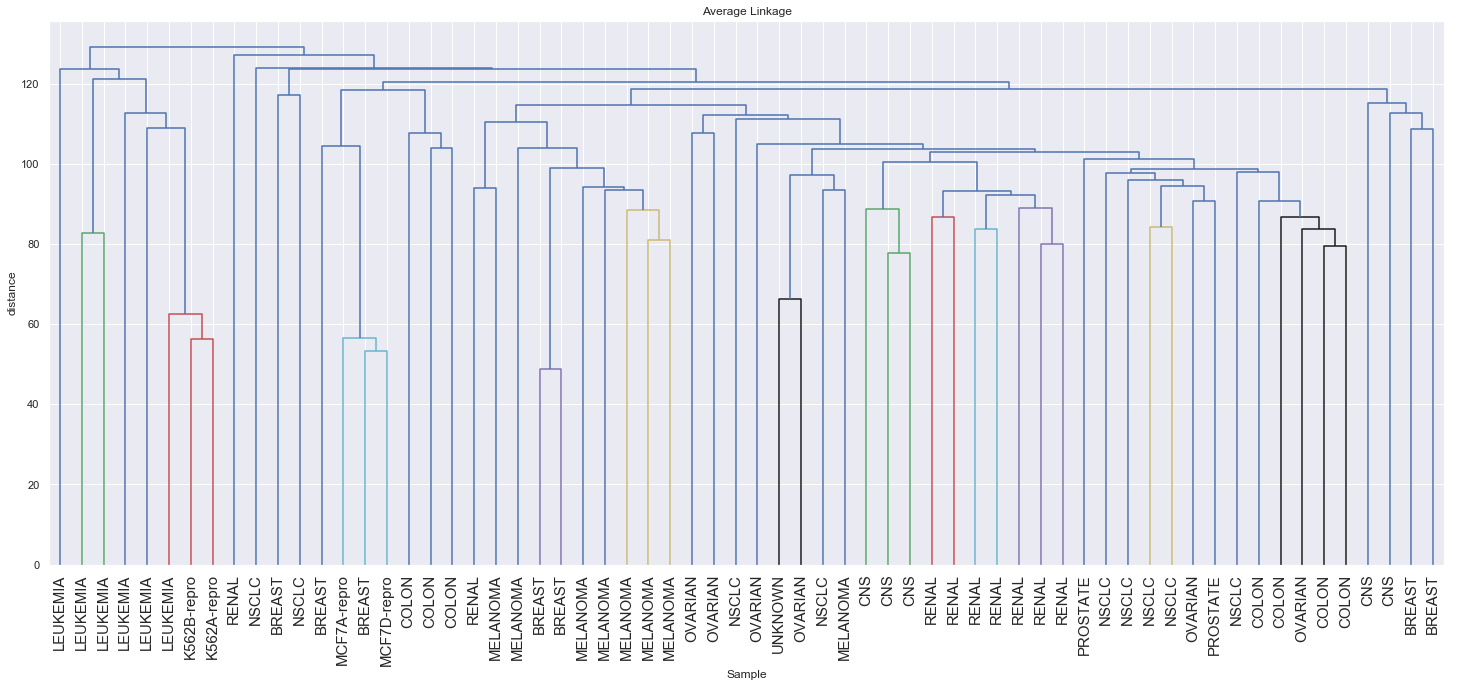

In [307]:
# # dendrogram for average linkage
plt.figure(figsize=(25, 10))
plt.title('Average Linkage')
plt.xlabel('Sample')
plt.ylabel('distance')
dendrogram(
    nci_avg,
    labels = nci_labs.x.values,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

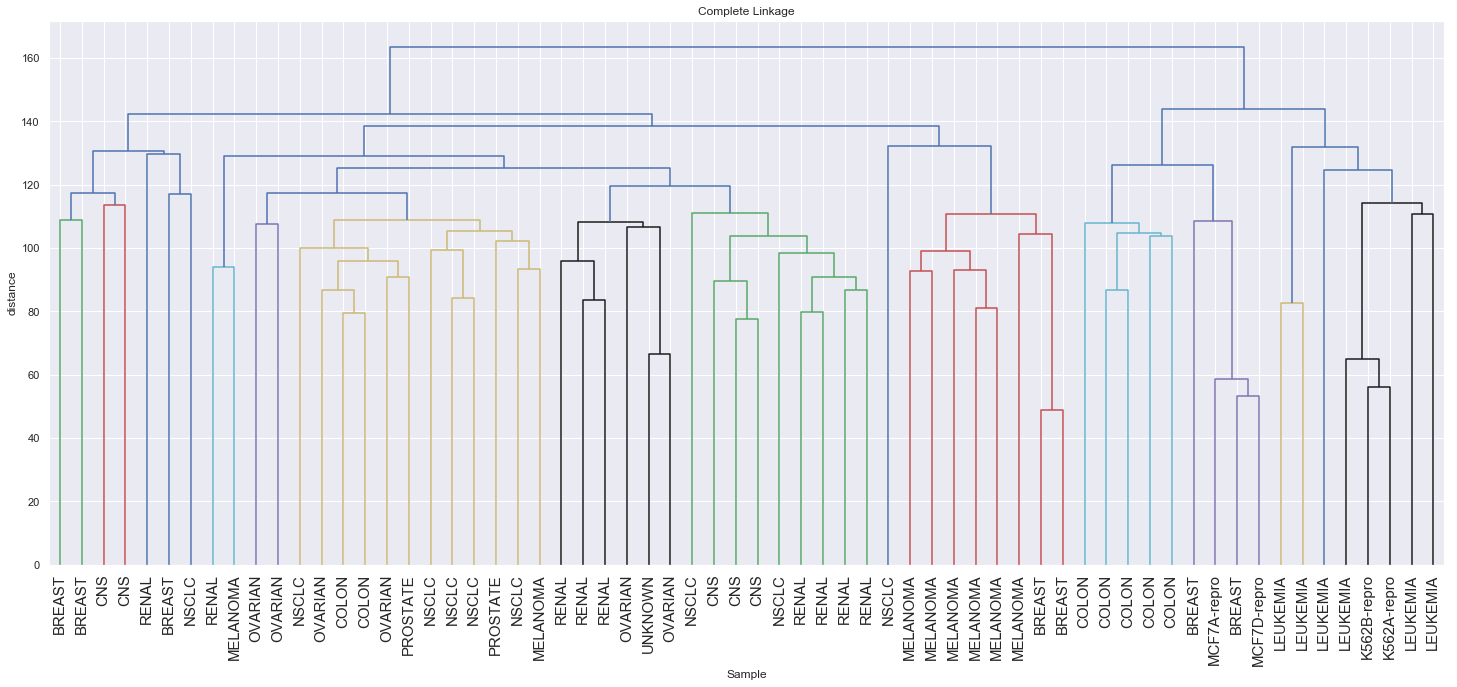

In [308]:
# dendrogram for complete linkage
plt.figure(figsize=(25, 10))
plt.title('Complete Linkage')
plt.xlabel('Sample')
plt.ylabel('distance')
dendrogram(
    nci_comp,
    labels = nci_labs.x.values,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [309]:
# complete linkage hierarchical clustering on gene data
h_clust = linkage(nci_data_scaled, 'complete')

In [310]:
# count of various type cancer when the whole data is clustered into 4
from scipy import cluster
cutree = cluster.hierarchy.cut_tree(h_clust, n_clusters=[4])
y = np.bincount(cutree[:,0])
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[ 0, 40],
       [ 1,  7],
       [ 2,  8],
       [ 3,  9]], dtype=int64)

In [311]:
# defining the maximum number of clusters
max_d = 4

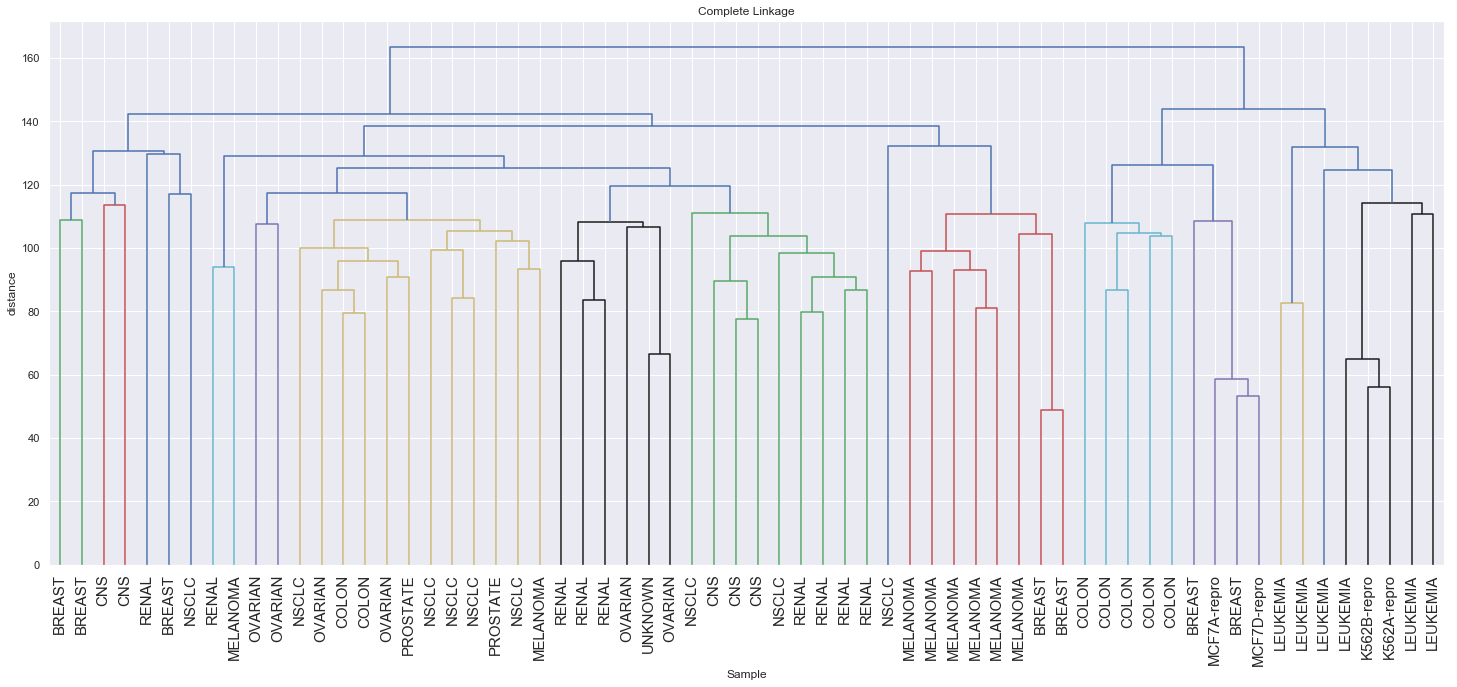

In [312]:
# dendrogram, the various colors depict the member of different cluster.
plt.figure(figsize=(25, 10))
plt.title('Complete Linkage')
plt.xlabel('Sample')
plt.ylabel('distance')
dendrogram(
    h_clust,
    get_leaves = 4,
    labels = nci_labs.x.values,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,# font size for the x axis labels
)
plt.show()